In [1]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
keyword = read_csv("Keyword_Report.csv")

In [4]:
keyword_copy = keyword.copy()

In [5]:
keyword_copy.shape

(6095, 16)

In [6]:
keyword['query_length'] = keyword['Keyword'].str.split().apply(len)

In [7]:
keyword["Revenue"].value_counts()

0        4892
50        400
100       174
150        80
200        64
250        56
350        39
300        33
400        27
500        25
450        25
550        22
600        16
650        16
750        15
700        12
850        10
1250        9
1050        8
1000        7
800         7
950         6
1750        6
1150        6
900         6
1800        5
1350        5
1100        4
1600        4
1200        4
         ... 
11350       1
5900        1
3250        1
15800       1
3550        1
3750        1
3850        1
12050       1
3950        1
6000        1
26150       1
3000        1
7650        1
27600       1
3100        1
3200        1
3300        1
7450        1
15750       1
23950       1
7850        1
5300        1
4050        1
32650       1
4100        1
12300       1
8250        1
21000       1
21100       1
3800        1
Name: Revenue, Length: 109, dtype: int64

In [8]:
keyword['Clicks']=keyword.Clicks.str.replace(',','').astype(int)

keyword['Conversions']=keyword.Conversions.str.replace(',','').astype(int)

keyword['Impressions']=keyword.Impressions.str.replace(',','').astype(int)

keyword['RPC']= keyword.Revenue/keyword.Clicks

keyword['CTR']= keyword.Clicks/keyword.Impressions

In [9]:
keyword.to_csv("Test1.csv")

In [10]:
keyword.Clicks.value_counts()

0       2275
1        790
2        367
3        243
4        178
5        148
7        104
6         99
8         86
9         76
10        58
11        55
13        39
22        35
12        33
14        33
17        30
15        29
19        28
16        27
21        26
18        25
20        24
25        23
28        20
34        19
26        18
29        17
23        17
24        17
        ... 
386        1
390        1
394        1
398        1
2215       1
138        1
827        1
126        1
823        1
783        1
759        1
751        1
711        1
695        1
691        1
2083       1
659        1
6185       1
639        1
627        1
619        1
599        1
1939       1
559        1
2115       1
555        1
2602       1
547        1
543        1
4090       1
Name: Clicks, Length: 544, dtype: int64

In [12]:
keyword[keyword.Clicks==0].Revenue.value_counts()

0      2271
50        3
100       1
Name: Revenue, dtype: int64

In [13]:
keyword[keyword.Clicks==0].CTR.value_counts()

0.0    2253
Name: CTR, dtype: int64

In [14]:
keyword[keyword.Clicks==0].CPC.value_counts()

0.0    2275
Name: CPC, dtype: int64

In [15]:
keyword_new = keyword[keyword.Clicks > 0].copy()

In [24]:
keyword_new.to_csv("ClicksGreaterThan0.csv")

In [18]:
keyword_new.shape

(3820, 19)

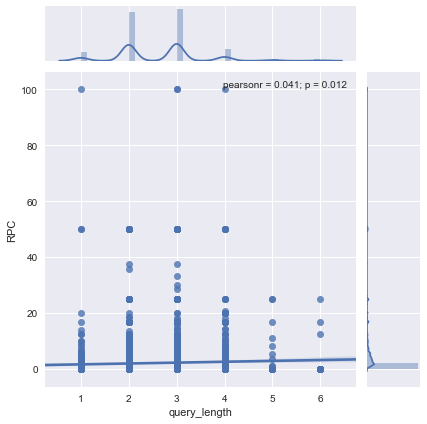

In [16]:
sns.jointplot("query_length","RPC", data=keyword_new, kind='reg')

In [17]:
keyword_new.RPC.value_counts()

0.000000     2621
16.666667      38
25.000000      35
50.000000      32
10.000000      32
7.142857       27
4.545455       24
5.555556       23
8.333333       22
6.250000       22
3.846154       20
12.500000      20
5.000000       15
3.125000       14
2.941176       12
3.571429       11
20.000000      11
4.166667       10
2.380952       10
1.162791        9
5.882353        8
2.631579        8
2.272727        8
5.263158        8
1.923077        8
3.333333        8
2.777778        8
11.111111       8
4.347826        7
2.500000        6
             ... 
1.794872        1
0.502513        1
2.747253        1
2.069791        1
4.455446        1
1.945525        1
16.981132       1
1.940850        1
3.017019        1
0.378788        1
5.235602        1
2.972292        1
0.632911        1
2.169982        1
2.069426        1
6.521739        1
2.678571        1
0.303030        1
1.146789        1
2.032520        1
0.341686        1
0.638298        1
5.006617        1
2.325581        1
1.010101  

In [19]:
keyword_new2= keyword_new[keyword_new.RPC>0.0].copy()

In [22]:
keyword_new2.to_csv("RPC_without0.csv")

In [21]:
keyword_new2.shape

(1199, 19)

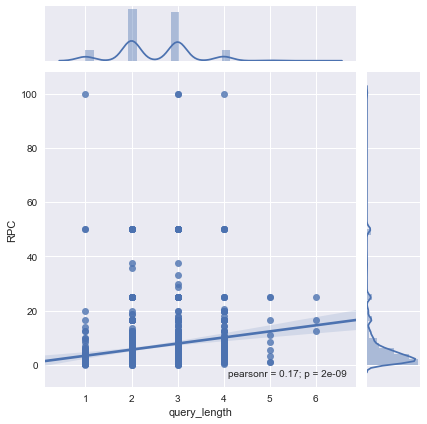

In [20]:
sns.jointplot("query_length","RPC", data=keyword_new2, kind='reg')

In [25]:
RPCWithout0_Normal = read_csv("RPCWithout0.csv")

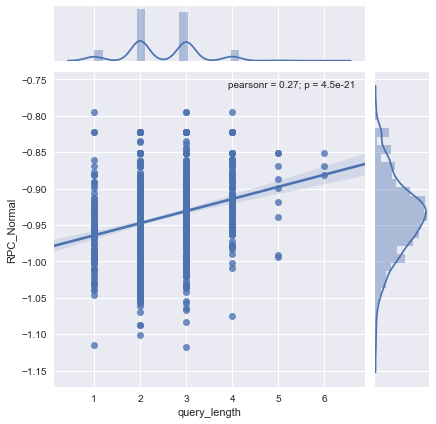

In [26]:
sns.jointplot("query_length","RPC_Normal", data=RPCWithout0_Normal, kind='reg')

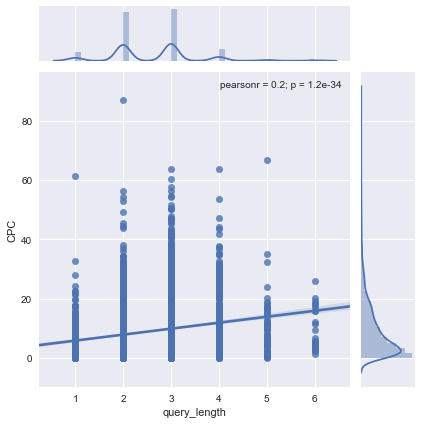

In [27]:
sns.jointplot("query_length","CPC", data=keyword_new, kind='reg')

In [29]:
keyword_new.CPC.value_counts()

0.05     13
2.30     12
0.48     10
0.51     10
4.62      9
0.01      9
0.74      9
0.68      9
0.47      8
1.07      8
1.09      8
2.35      8
2.51      8
3.58      8
3.17      7
4.46      7
1.86      7
0.64      7
5.54      7
0.54      7
4.10      7
2.40      7
0.25      7
2.14      7
4.03      7
1.81      7
1.31      7
1.00      7
1.15      7
1.77      7
         ..
14.34     1
63.60     1
12.41     1
15.66     1
19.07     1
18.39     1
5.52      1
9.48      1
36.84     1
45.53     1
13.26     1
12.63     1
7.21      1
9.96      1
12.68     1
45.38     1
13.80     1
10.30     1
12.57     1
25.08     1
25.21     1
18.29     1
38.12     1
3.02      1
28.20     1
40.93     1
13.72     1
5.89      1
29.74     1
6.35      1
Name: CPC, Length: 1848, dtype: int64

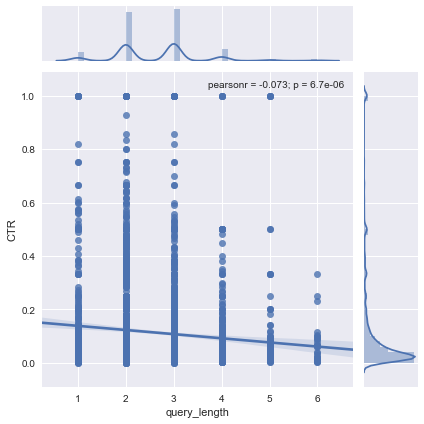

In [28]:
sns.jointplot("query_length","CTR", data=keyword_new, kind='reg')

In [30]:
keyword_new.CTR.value_counts()

1.000000    86
0.500000    71
0.333333    61
0.250000    44
0.166667    36
0.200000    36
0.076923    35
0.142857    29
0.058824    29
0.111111    29
0.125000    27
0.083333    27
0.090909    26
0.062500    26
0.071429    26
0.100000    25
0.066667    24
0.055556    24
0.052632    22
0.037037    17
0.047619    17
0.040000    17
0.045455    17
0.035714    15
0.032258    15
0.029412    14
0.041667    12
0.666667    12
0.031250    12
0.026316    11
            ..
0.637931     1
0.016495     1
0.031915     1
0.018450     1
0.080058     1
0.617371     1
0.013059     1
0.019455     1
0.021340     1
0.018717     1
0.036572     1
0.034325     1
0.009195     1
0.028738     1
0.039258     1
0.009569     1
0.003362     1
0.454774     1
0.024096     1
0.007172     1
0.014087     1
0.046032     1
0.012839     1
0.032362     1
0.034871     1
0.033835     1
0.011249     1
0.008366     1
0.024038     1
0.266760     1
Name: CTR, Length: 2319, dtype: int64

In [32]:
CPC_normal = read_csv("CPC_NORMAL.csv")

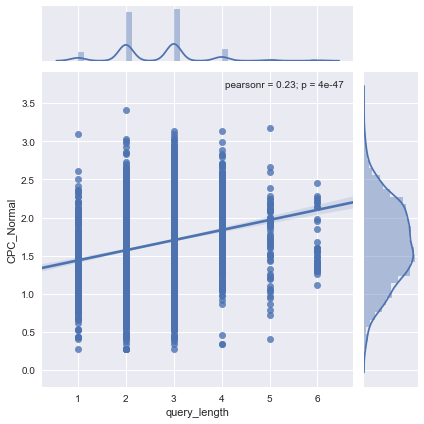

In [34]:
sns.jointplot("query_length","CPC_Normal", data=CPC_normal, kind='reg')

In [40]:
CTR_normal = read_csv("CTRNormal.csv")

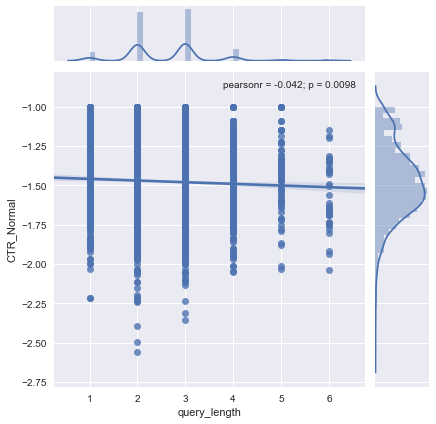

In [42]:
sns.jointplot("query_length","CTR_Normal", data=CTR_normal, kind='reg')

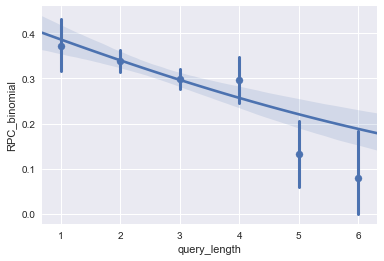

In [43]:
keyword_new['RPC_binomial'] = keyword_new['RPC'].apply(lambda x: 1 if x>0 else 0)

sns.regplot(x="query_length", y="RPC_binomial", x_bins=range(20), data=keyword_new, logistic=True)

In [44]:
keyword_new.to_csv("RPC_binomial.csv")

In [45]:
keyword_new.to_csv("Further_Analysis.csv")

keyword_new_Google = keyword_new[keyword_new["Search Engine"]=="Google Adwords"]

keyword_new_Microsoft = keyword_new[keyword_new["Search Engine"]=="Microsoft Bing Ads"]

keyword_new_Yahoo = keyword_new[keyword_new["Search Engine"]=="Yahoo Gemini"]

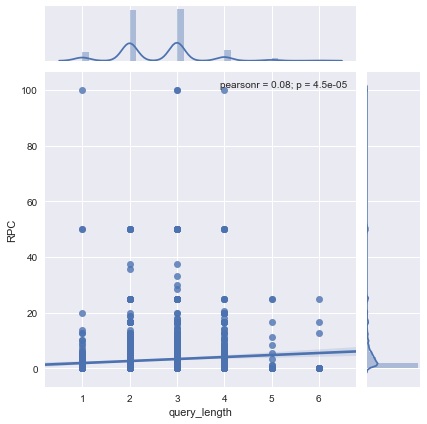

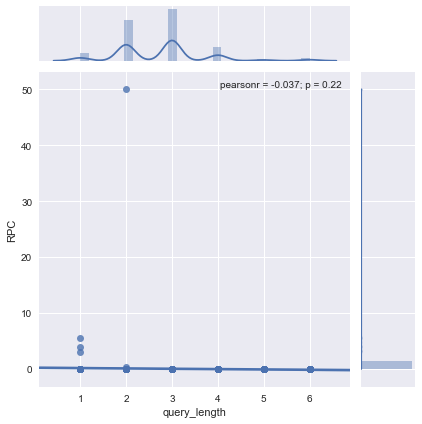

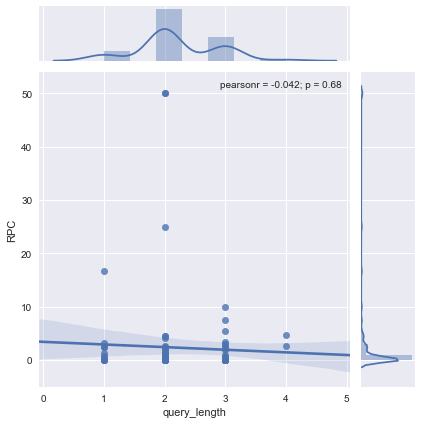

In [46]:
sns.jointplot("query_length","RPC", data=keyword_new_Google, kind='reg')
sns.jointplot("query_length","RPC", data=keyword_new_Microsoft, kind='reg')
sns.jointplot("query_length","RPC", data=keyword_new_Yahoo, kind='reg')

# RPC for Google increasing

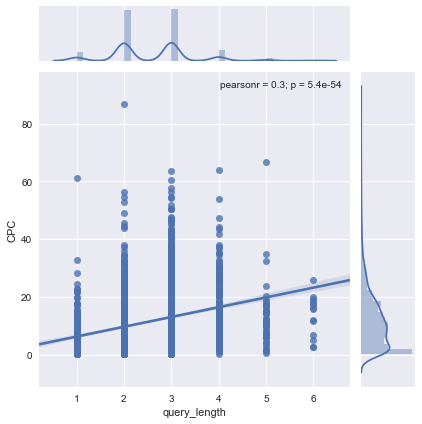

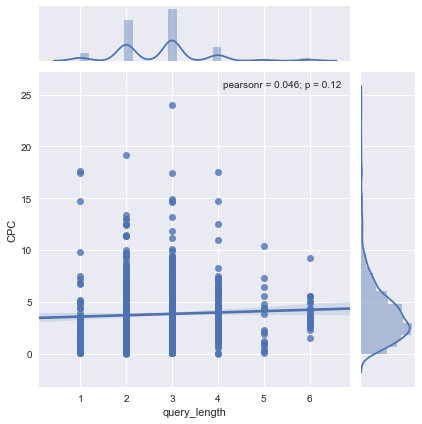

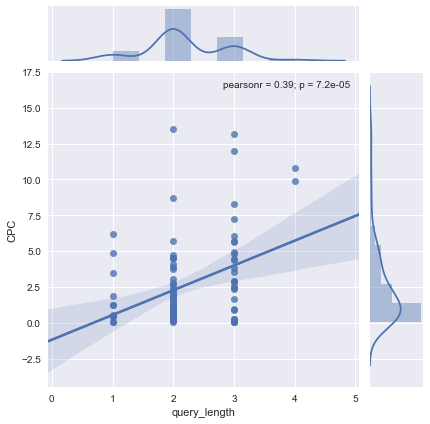

In [47]:
sns.jointplot("query_length","CPC", data=keyword_new_Google, kind='reg')

sns.jointplot("query_length","CPC", data=keyword_new_Microsoft, kind='reg')

sns.jointplot("query_length","CPC", data=keyword_new_Yahoo, kind='reg')

# CPC Google and Yahoo increasing

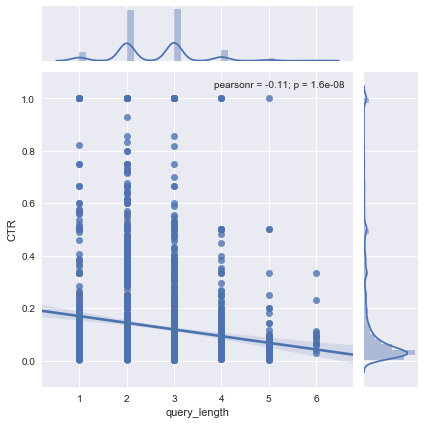

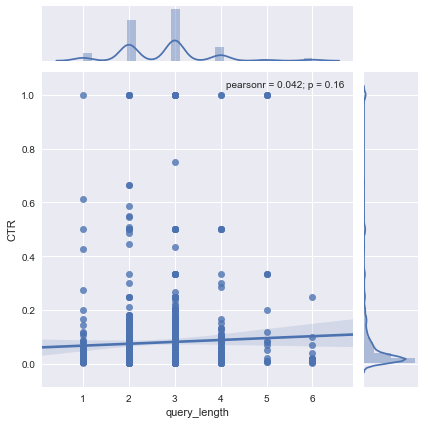

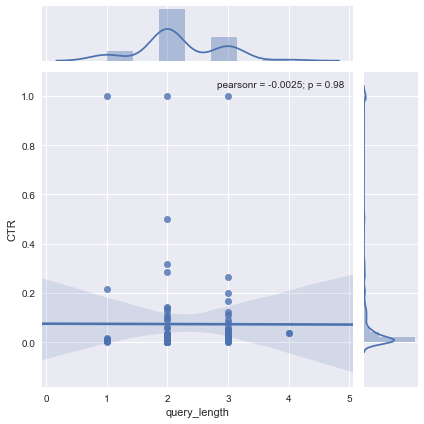

In [48]:
sns.jointplot("query_length","CTR", data=keyword_new_Google, kind='reg')

sns.jointplot("query_length","CTR", data=keyword_new_Microsoft, kind='reg')

sns.jointplot("query_length","CTR", data=keyword_new_Yahoo, kind='reg')

# CTR Google deacreasing

In [49]:
keyword_new_Exact = keyword_new[keyword_new["Listing Match Type"]=="Exact"]

keyword_new_Content = keyword_new[keyword_new["Listing Match Type"]=="Content"]

keyword_new_Phrase= keyword_new[keyword_new["Listing Match Type"]=="Phrase"]
keyword_new_Broad= keyword_new[keyword_new["Listing Match Type"]=="Broad"]


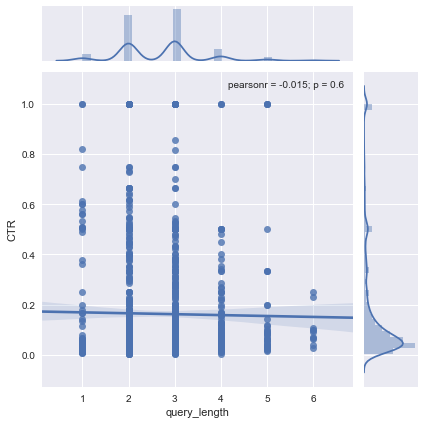

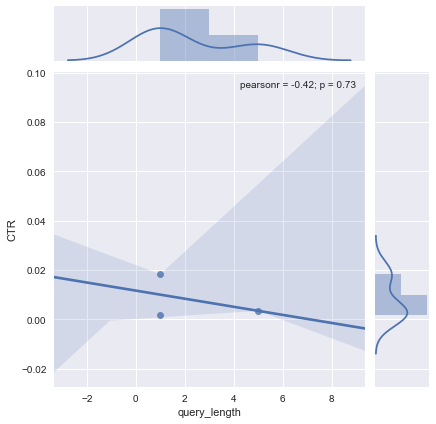

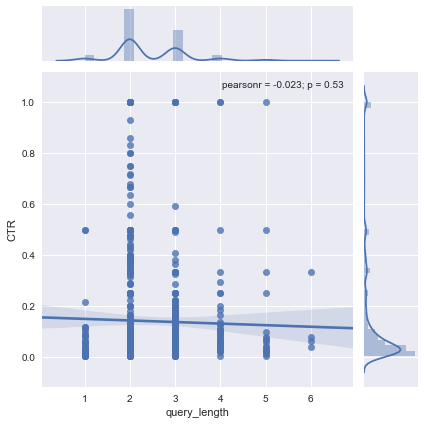

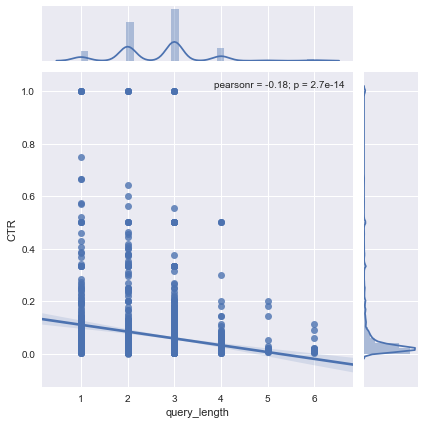

In [50]:
sns.jointplot("query_length","CTR", data=keyword_new_Exact, kind='reg')

sns.jointplot("query_length","CTR", data=keyword_new_Content, kind='reg')

sns.jointplot("query_length","CTR", data=keyword_new_Phrase, kind='reg')
sns.jointplot("query_length","CTR", data=keyword_new_Broad, kind='reg')

#CTR broad only decreasing

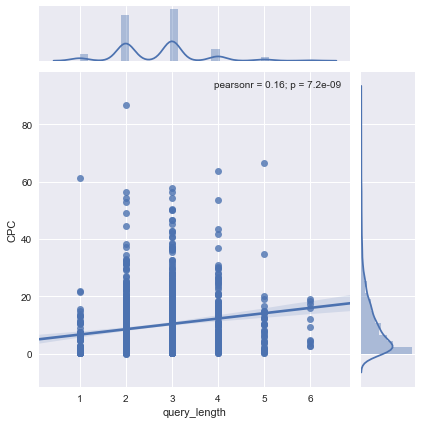

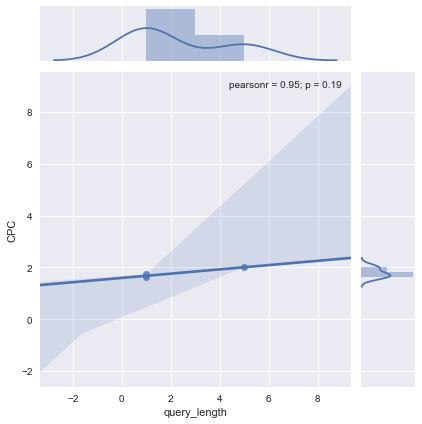

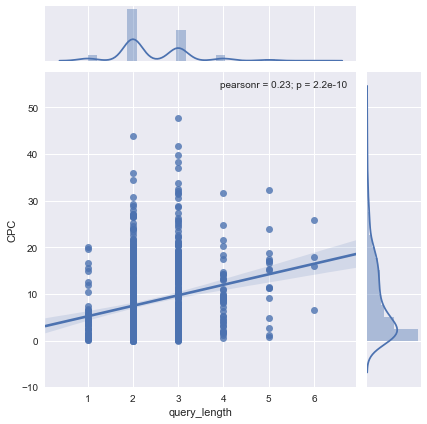

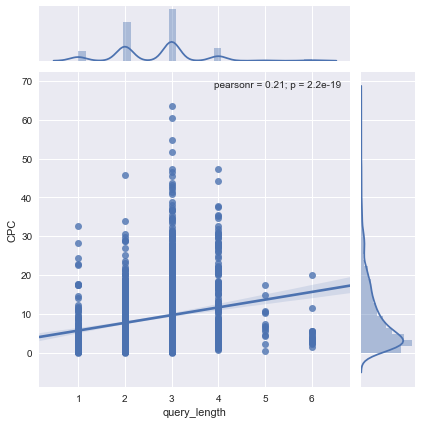

In [51]:
sns.jointplot("query_length","CPC", data=keyword_new_Exact, kind='reg')

sns.jointplot("query_length","CPC", data=keyword_new_Content, kind='reg')

sns.jointplot("query_length","CPC", data=keyword_new_Phrase, kind='reg')
sns.jointplot("query_length","CPC", data=keyword_new_Broad, kind='reg')

# Exact, Phrase and Braod increasing

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


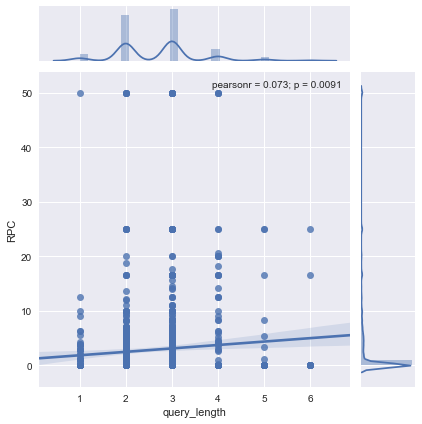

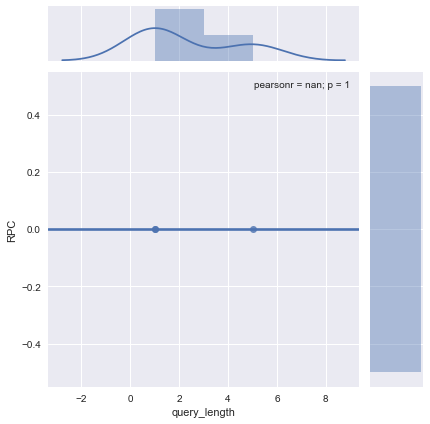

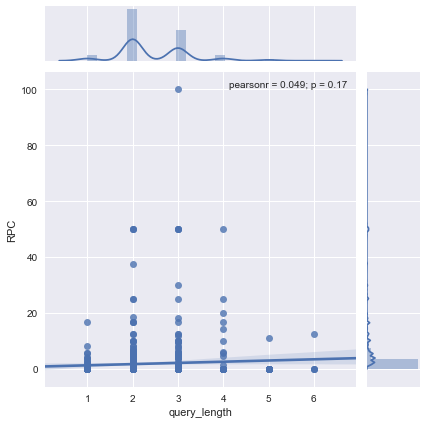

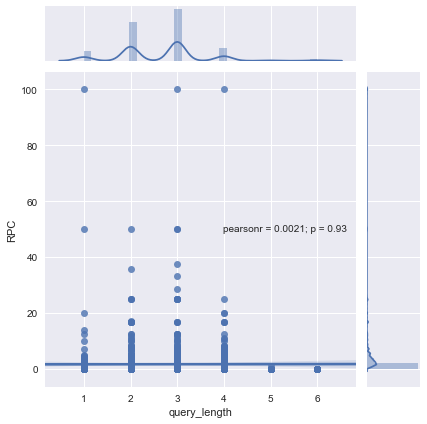

In [52]:
sns.jointplot("query_length","RPC", data=keyword_new_Exact, kind='reg')

sns.jointplot("query_length","RPC", data=keyword_new_Content, kind='reg')

sns.jointplot("query_length","RPC", data=keyword_new_Phrase, kind='reg')
sns.jointplot("query_length","RPC", data=keyword_new_Broad, kind='reg')

# RPC for exact is increasing, broad is decerasing 

In [53]:
keyword_Google_broad = keyword_new_Google[keyword_new_Google["Listing Match Type"]=="Broad"]
keyword_Google_exact = keyword_new_Google[keyword_new_Google["Listing Match Type"]=="Exact"]
keyword_Google_phrase = keyword_new_Google[keyword_new_Google["Listing Match Type"]=="Phrase"]
keyword_Google_content = keyword_new_Google[keyword_new_Google["Listing Match Type"]=="Content"]

keyword_Microsoft_broad = keyword_new_Microsoft[keyword_new_Microsoft["Listing Match Type"]=="Broad"]
keyword_Microsoft_exact = keyword_new_Microsoft[keyword_new_Microsoft["Listing Match Type"]=="Exact"]
keyword_Microsoft_phrase = keyword_new_Microsoft[keyword_new_Microsoft["Listing Match Type"]=="Phrase"]
keyword_Microsoft_content = keyword_new_Microsoft[keyword_new_Microsoft["Listing Match Type"]=="Content"]

keyword_Yahoo_broad = keyword_new_Yahoo[keyword_new_Yahoo["Listing Match Type"]=="Broad"]
keyword_Yahoo_exact = keyword_new_Yahoo[keyword_new_Yahoo["Listing Match Type"]=="Exact"]
keyword_Yahoo_phrase = keyword_new_Yahoo[keyword_new_Yahoo["Listing Match Type"]=="Phrase"]
keyword_Yahoo_content = keyword_new_Yahoo[keyword_new_Yahoo["Listing Match Type"]=="Content"]

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


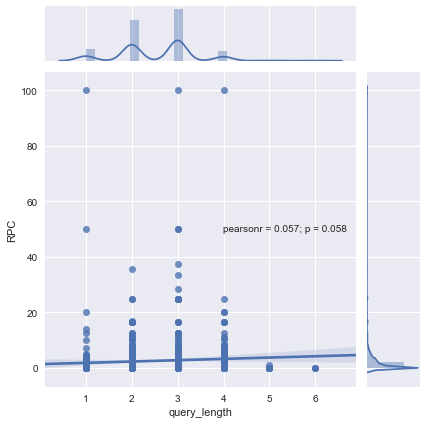

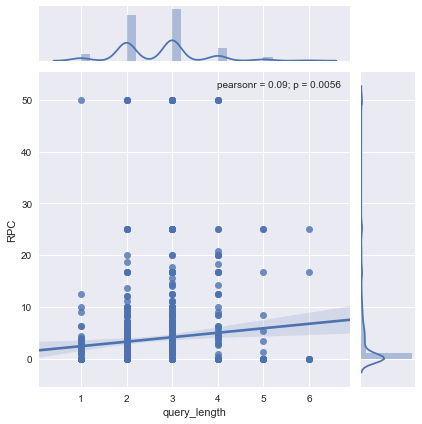

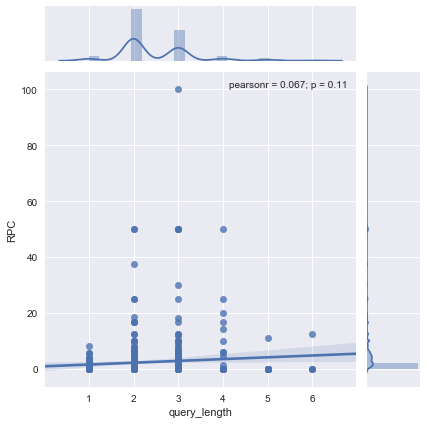

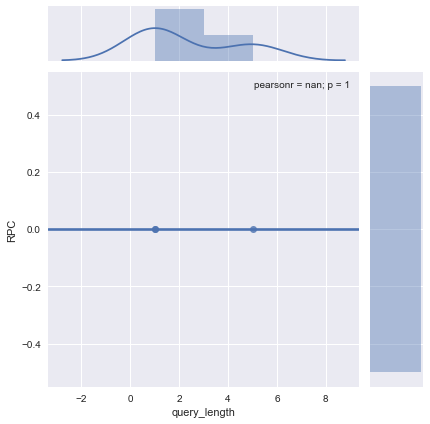

In [54]:
sns.jointplot("query_length","RPC", data=keyword_Google_broad, kind='reg')

sns.jointplot("query_length","RPC", data=keyword_Google_exact, kind='reg')

sns.jointplot("query_length","RPC", data=keyword_Google_phrase, kind='reg')
sns.jointplot("query_length","RPC", data=keyword_Google_content, kind='reg')

# Google exact is statistically significant, RPC incraesing

ZeroDivisionError: float division by zero

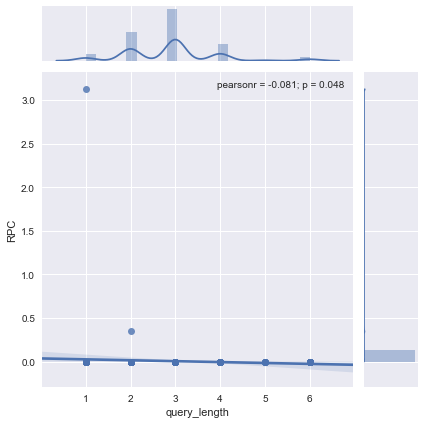

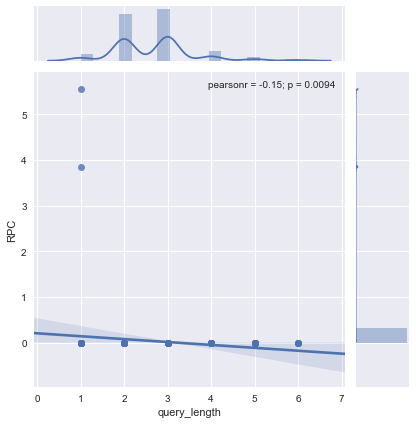

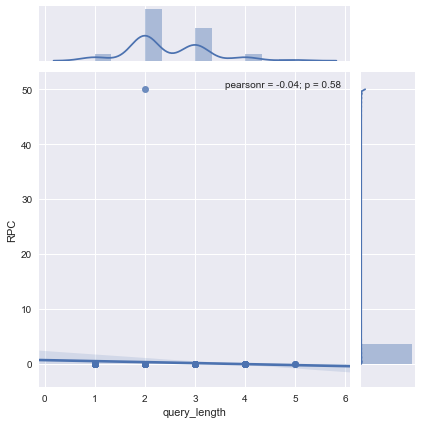

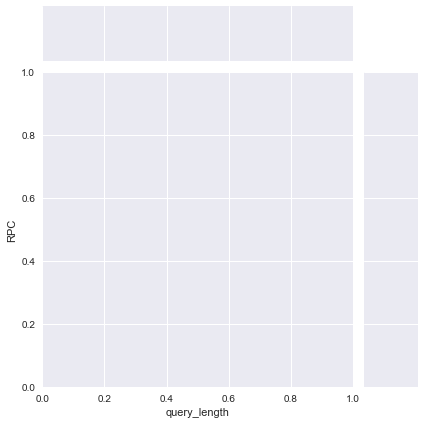

In [55]:
sns.jointplot("query_length","RPC", data=keyword_Microsoft_broad, kind='reg')

sns.jointplot("query_length","RPC", data=keyword_Microsoft_exact, kind='reg')

sns.jointplot("query_length","RPC", data=keyword_Microsoft_phrase, kind='reg')
sns.jointplot("query_length","RPC", data=keyword_Microsoft_content, kind='reg')

#RPC for Microsoft exact is drecreasing

ZeroDivisionError: float division by zero

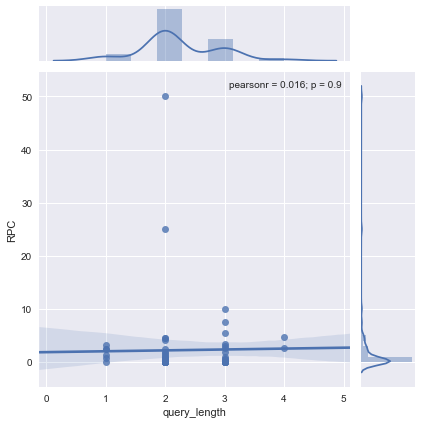

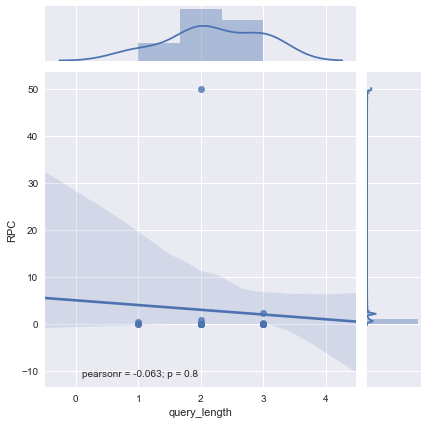

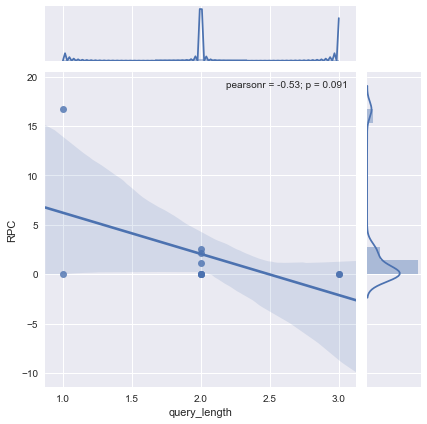

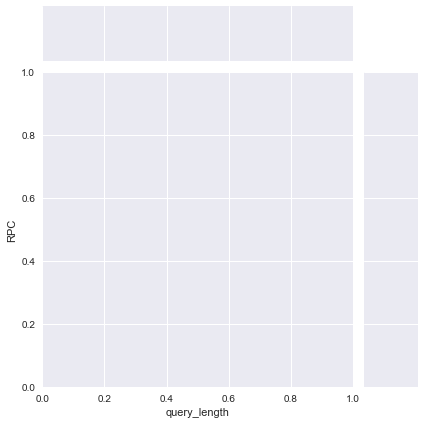

In [56]:
sns.jointplot("query_length","RPC", data=keyword_Yahoo_broad, kind='reg')

sns.jointplot("query_length","RPC", data=keyword_Yahoo_exact, kind='reg')

sns.jointplot("query_length","RPC", data=keyword_Yahoo_phrase, kind='reg')
sns.jointplot("query_length","RPC", data=keyword_Yahoo_content, kind='reg')

# None are statistically significant

ZeroDivisionError: float division by zero

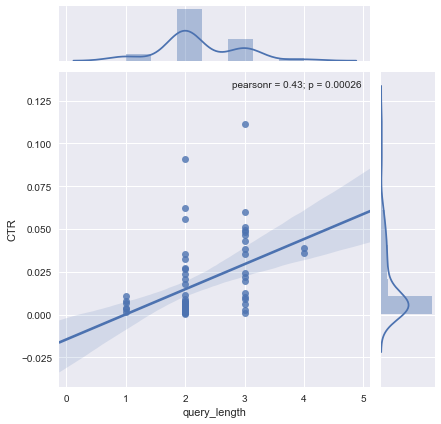

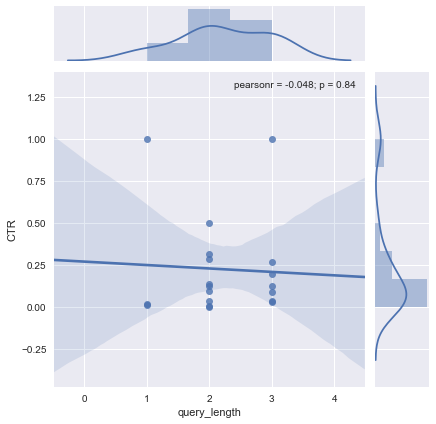

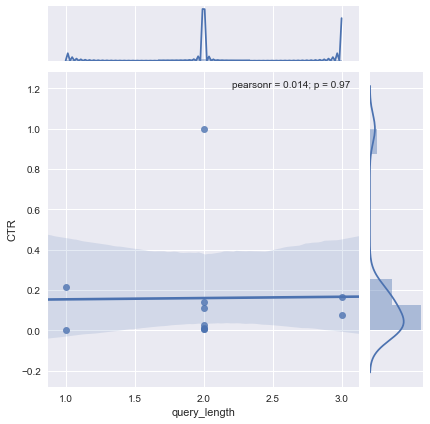

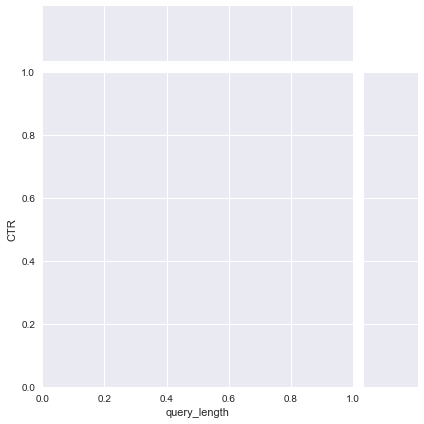

In [57]:
sns.jointplot("query_length","CTR", data=keyword_Yahoo_broad, kind='reg')

sns.jointplot("query_length","CTR", data=keyword_Yahoo_exact, kind='reg')

sns.jointplot("query_length","CTR", data=keyword_Yahoo_phrase, kind='reg')
sns.jointplot("query_length","CTR", data=keyword_Yahoo_content, kind='reg')

# Google braod increasing

ZeroDivisionError: float division by zero

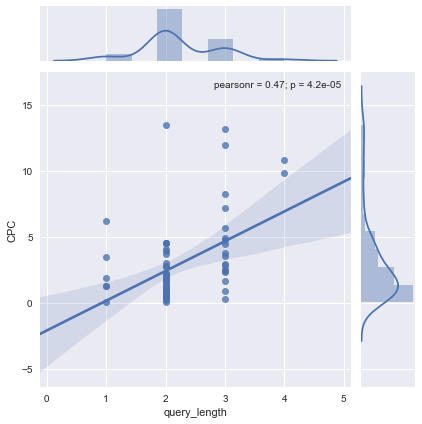

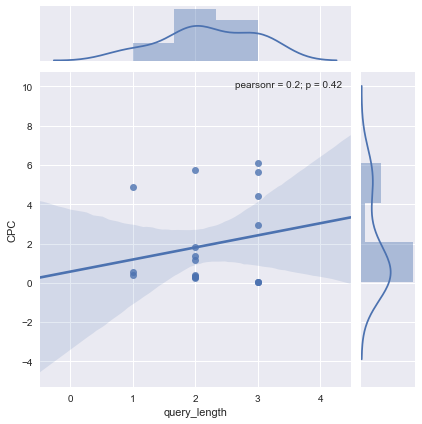

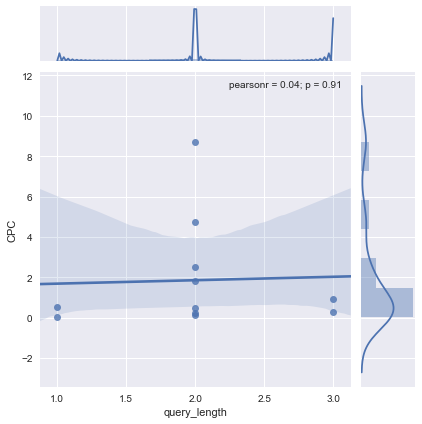

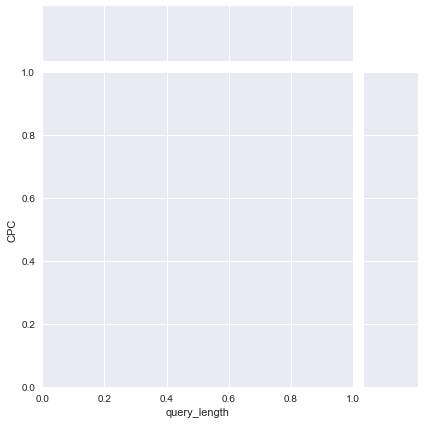

In [58]:
sns.jointplot("query_length","CPC", data=keyword_Yahoo_broad, kind='reg')

sns.jointplot("query_length","CPC", data=keyword_Yahoo_exact, kind='reg')

sns.jointplot("query_length","CPC", data=keyword_Yahoo_phrase, kind='reg')
sns.jointplot("query_length","CPC", data=keyword_Yahoo_content, kind='reg')

# CPC for braod is increasing

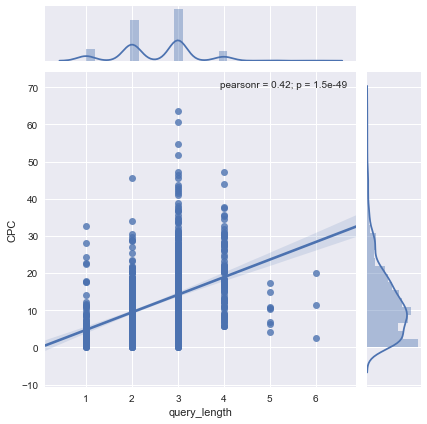

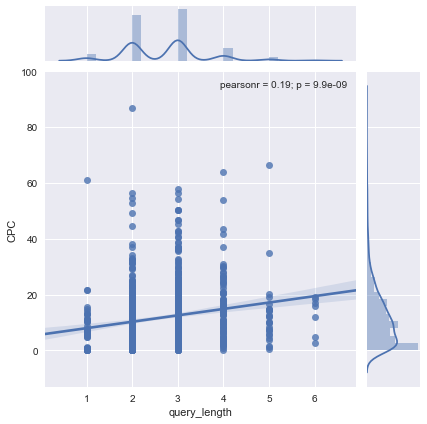

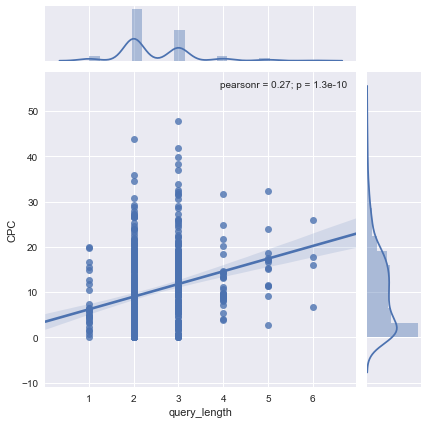

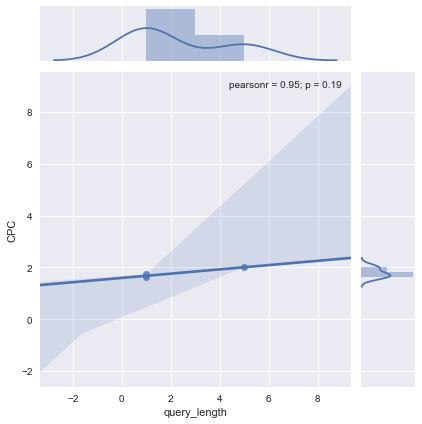

In [59]:
sns.jointplot("query_length","CPC", data=keyword_Google_broad, kind='reg')

sns.jointplot("query_length","CPC", data=keyword_Google_exact, kind='reg')

sns.jointplot("query_length","CPC", data=keyword_Google_phrase, kind='reg')
sns.jointplot("query_length","CPC", data=keyword_Google_content, kind='reg')

# CPC increasing for broad, exact, phrase, Content not statistically significant

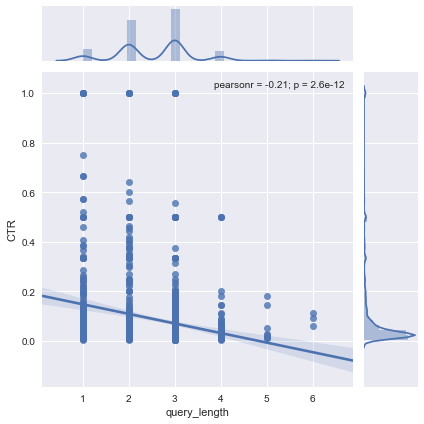

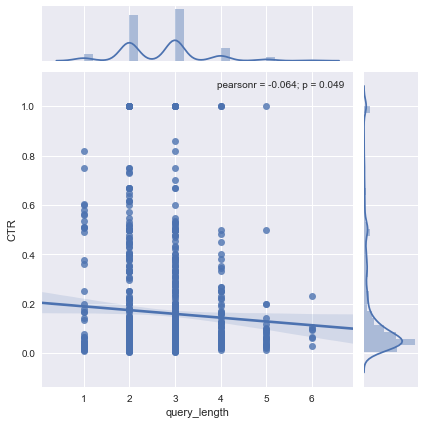

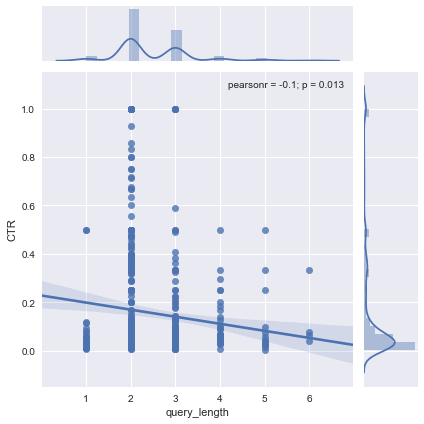

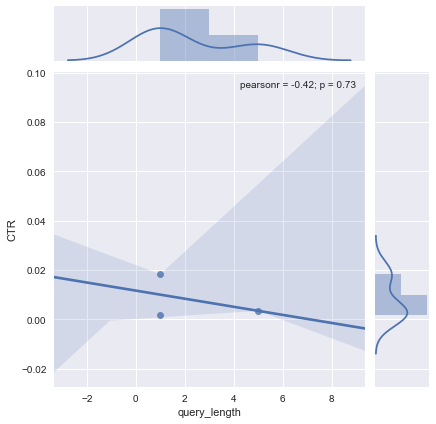

In [60]:
sns.jointplot("query_length","CTR", data=keyword_Google_broad, kind='reg')

sns.jointplot("query_length","CTR", data=keyword_Google_exact, kind='reg')

sns.jointplot("query_length","CTR", data=keyword_Google_phrase, kind='reg')
sns.jointplot("query_length","CTR", data=keyword_Google_content, kind='reg')

# CTR for braod is decreasing, others not statistically significant

ZeroDivisionError: float division by zero

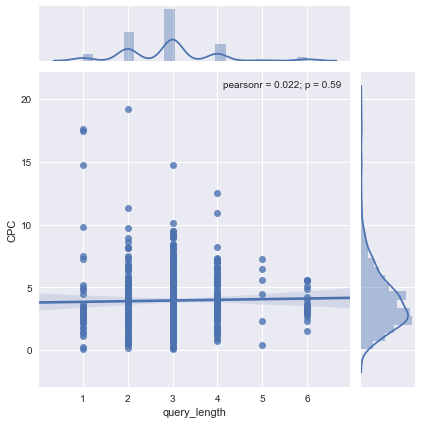

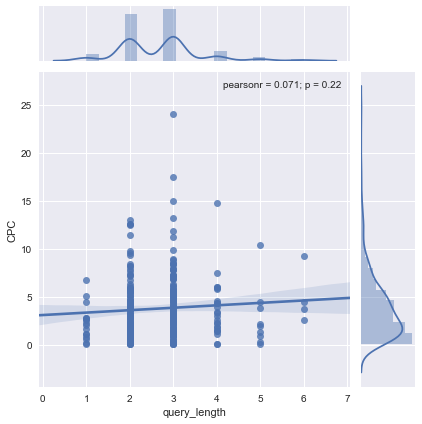

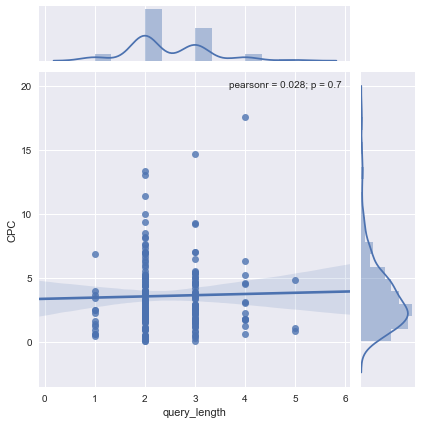

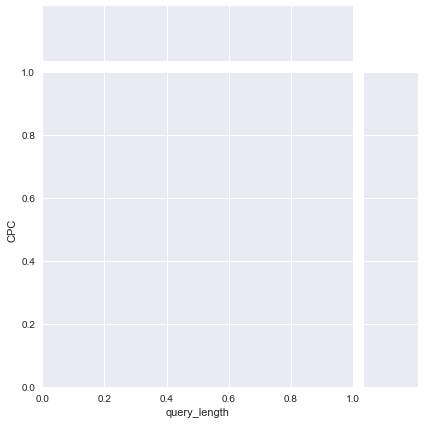

In [61]:
sns.jointplot("query_length","CPC", data=keyword_Microsoft_broad, kind='reg')

sns.jointplot("query_length","CPC", data=keyword_Microsoft_exact, kind='reg')

sns.jointplot("query_length","CPC", data=keyword_Microsoft_phrase, kind='reg')
sns.jointplot("query_length","CPC", data=keyword_Microsoft_content, kind='reg')

# None are statistically significant

ZeroDivisionError: float division by zero

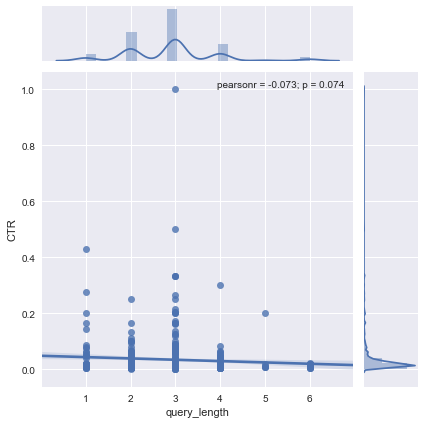

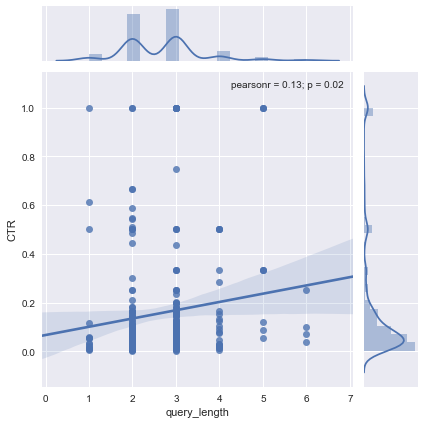

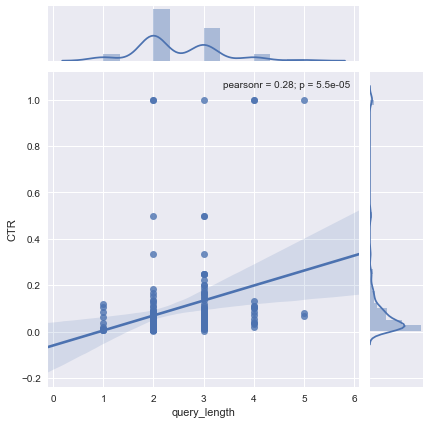

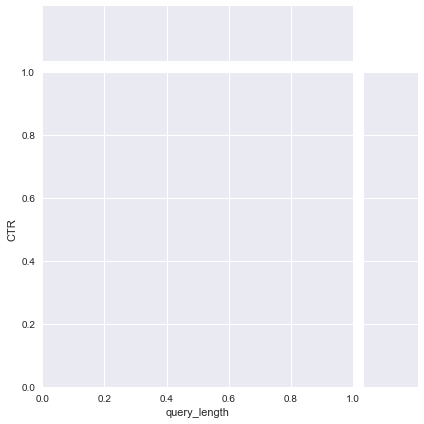

In [62]:
sns.jointplot("query_length","CTR", data=keyword_Microsoft_broad, kind='reg')

sns.jointplot("query_length","CTR", data=keyword_Microsoft_exact, kind='reg')

sns.jointplot("query_length","CTR", data=keyword_Microsoft_phrase, kind='reg')
sns.jointplot("query_length","CTR", data=keyword_Microsoft_content, kind='reg')


# CTR for Microsoft phrase increasing

TypeError: string indices must be integers

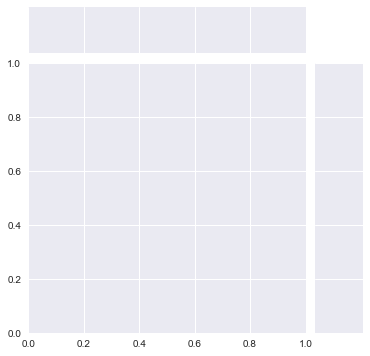

In [75]:
sns.jointplot("
              ","CPC", data=keyword_Google_broad, kind='reg')

# sns.jointplot("CPC","Avg.Position", data=keyword_Google_exact, kind='reg')
# sns.jointplot("CPC","Avg.Position", data=keyword_Yahoo_broad, kind='reg')

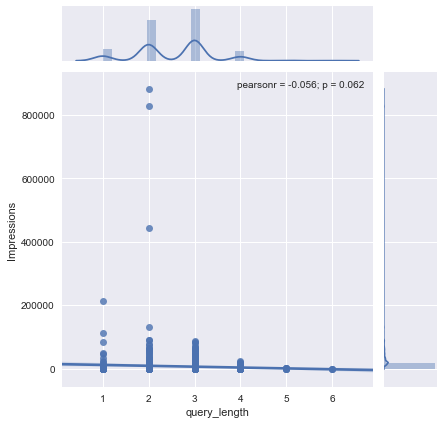

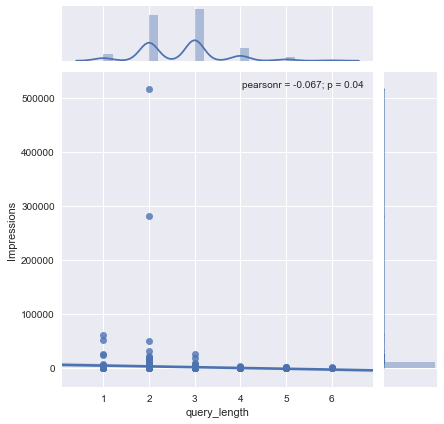

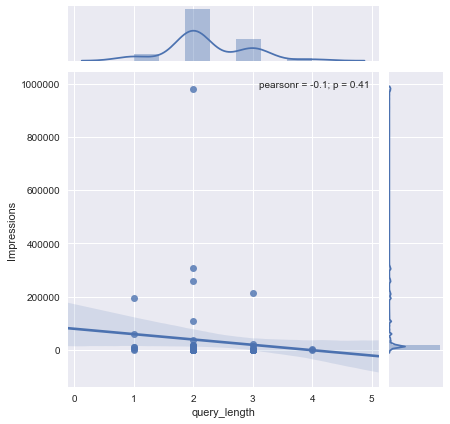

In [64]:
sns.jointplot("query_length","Impressions", data=keyword_Google_broad, kind='reg')

sns.jointplot("query_length","Impressions", data=keyword_Google_exact, kind='reg')
sns.jointplot("query_length","Impressions", data=keyword_Yahoo_broad, kind='reg')

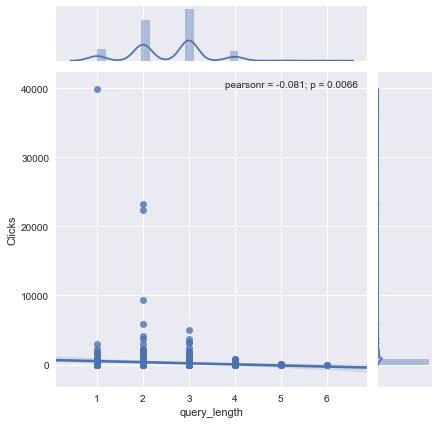

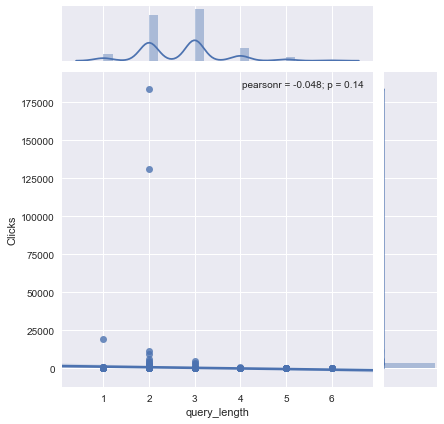

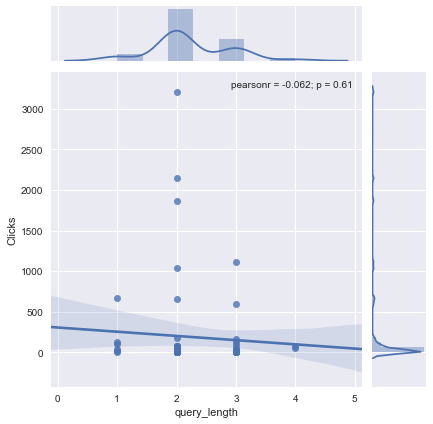

In [66]:
sns.jointplot("query_length","Clicks", data=keyword_Google_broad, kind='reg')

sns.jointplot("query_length","Clicks", data=keyword_Google_exact, kind='reg')
sns.jointplot("query_length","Clicks", data=keyword_Yahoo_broad, kind='reg')